In [1]:
import os
import os.path as osp
import pandas as pd
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm

from exlib.model import WeightResNet34
from exlib.dataset import WeightDataset
from torch.utils.data import DataLoader

# visualize loss

In [2]:
results = pd.read_pickle('results/metrics.pkl')

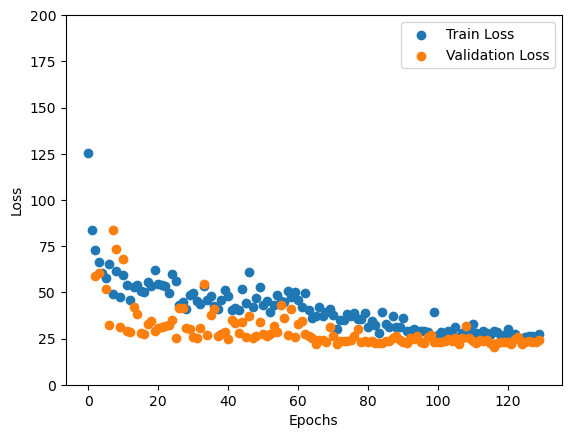

In [3]:
# Plot the losses
plt.scatter(range(len(results)), results['train_loss'], label='Train Loss')
plt.scatter(range(len(results)), results['val_loss'], label='Validation Loss')
plt.ylim([0,200])

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# visualize predictions

In [7]:
# directories
data_dir = '../../data/weight_regression'
images_base_dir = osp.join(data_dir, 'images')
val_df_path = osp.join(data_dir, 'val.csv')

# dataset and trained model
valset = WeightDataset(val_df_path, images_base_dir)
valloader = DataLoader(valset, batch_size=1)
model = WeightResNet34()
best_ckpt = torch.load('results/best_ckpt_epoch.pt')
model.load_state_dict(best_ckpt)
model = model.cuda()
model.eval()


WeightResNet34(
  (resnet34): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, t

In [8]:
preds = []
targets = []
with torch.no_grad():
    for image, target in tqdm(valloader):
        image = image.cuda()
        pred = model(image)
        preds.append(pred.item())
        targets.append(target.item())

100%|██████████| 148/148 [00:40<00:00,  3.69it/s]


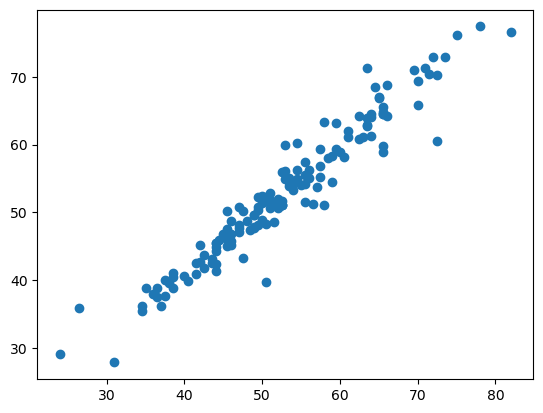

In [9]:
plt.scatter(targets, preds)